- Tây Bắc Bộ: Lào Cai, Yên Bái, Điện Biên, Hòa Bình, Lai Châu, Sơn La (6 tỉnh)

- Đông Bắc Bộ: Hà Giang, Cao Bằng, Bắc Kạn, Lạng Sơn, Tuyên Quang, Thái Nguyên, Phú Thọ, Bắc Giang, Quảng Ninh (9 tỉnh)

- Đồng bằng sông Hồng: Bắc Ninh, Hà Nam, Hà Nội, Hải Dương, Hưng Yên, Hải Phòng, Nam Định, Ninh Bình, Thái Bình, Vĩnh Phúc (10 tỉnh)



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/DS_PROJECT_FINAL TEST')

Mounted at /content/drive


### **Đọc các sheet trong file .xlxs thành bảng DataFrames**

In [ ]:
def load_dataframes_from_excel(filename):
    data = pd.read_excel(filename, sheet_name=None)
    dataFrames = {}
    for sheet_name, sheet_data in data.items():
        df = pd.DataFrame(sheet_data)
        dataFrames[sheet_name] = df
    return dataFrames

# Sử dụng hàm để tạo ra một loạt các DataFrame từ file .xlsx
dataFrames = load_dataframes_from_excel("Dong bang song Hong.xlsx")

# Tạo danh sách các tên tỉnh thành
provinces = ['Bac_Ninh', 'Ha_Nam', 'Ha_Noi', 'Hai_Duong', 'Hung_Yen', 'Hai_Phong', 'Nam_Dinh', 'Ninh_Binh', 'Thai_Binh', 'Vinh_Phuc']

# Tạo danh sách các DataFrame từ tên tỉnh thành
province_dataFrames = [dataFrames[province] for province in provinces]
dataFrames['Ha_Noi']

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,34.5,27.2,30.7,10.8,4.0,70,Heavy rain at times,7
1,2022-06-30,30.4,25.6,27.5,11.5,17.0,82,Moderate or heavy rain shower,7
2,2022-07-01,33.5,25.3,28.9,11.2,8.5,72,Moderate or heavy rain shower,7
3,2022-07-02,36.4,27.0,31.1,18.4,0.9,67,Patchy rain possible,8
4,2022-07-03,34.3,26.9,29.3,12.6,10.0,85,Heavy rain at times,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,30.5,24.1,26.5,12.6,32.6,88,Moderate or heavy rain shower,7
363,2023-06-27,32.4,24.7,28.2,17.6,9.3,81,Light rain shower,7
364,2023-06-28,33.6,26.0,29.5,19.4,2.6,78,Patchy rain possible,7
365,2023-06-29,35.9,26.5,30.6,20.9,1.7,75,Light rain shower,8


In [ ]:
dataFrames['Ha_Noi'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              367 non-null    object 
 1   Temperature Max  367 non-null    float64
 2   Temperature Min  367 non-null    float64
 3   Temperature Avg  367 non-null    float64
 4   MaxWind_km/h     367 non-null    float64
 5   TotalPrecip_mm   367 non-null    float64
 6   Humidity Avg     367 non-null    int64  
 7   Comment          367 non-null    object 
 8   UV Index         367 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 25.9+ KB


In [ ]:
dataFrames['Ha_Noi'].columns

Index(['Day', 'Temperature Max', 'Temperature Min', 'Temperature Avg',
       'MaxWind_km/h', 'TotalPrecip_mm', 'Humidity Avg', 'Comment',
       'UV Index'],
      dtype='object')

**Nhận xét chung:**
- Thông qua bảng data đại diện của Hà Nội, thì ta có thể rút ra nhận xét, mỗi bảng dữ liệu đều gồm có 367 dòng (thời gian từ 29/06/2022 - 30/06/2023) và 9 cột thuộc tính gồm (2 biến định tính và 7 biến định lượng)
- Tuy nhiên kiểu dữ liệu cột `Date` ở đây đang lưu chưa đúng kiểu dữ liệu => **Chỉnh sửa**
- Ý nghĩa của các thuộc tính:
    + `Day`: Ngày quan sát lấy dữ liệu
    + `Temperature Max`: Nhiệt độ cao nhất(độ C) trong ngày đó.
    + `Temperature Min`: Nhiệt độ thấp nhất(độ C) trong ngày đó.
    + `Temperature Avg`: Nhiệt độ trung bình(độ C) trong ngày đó.
    + `MaxWind_km/h`: Sức(Tốc độ) gió lớn nhất(km/h) trong ngày đó.
    + `TotalPrecip_mm`: Tổng lượng mưa(mm) trong ngày đó.
    + `Humidity Avg`: Độ ẩm trung bình(%) trong ngày đó.
    + `Comment`: Các ghi chú hoặc thông tin dự báo khác về ngày đó.
    + `UV Index`: Chỉ số tia tử ngoại trong ngày đó.


In [ ]:
dataFrames['Ha_Noi']['Day'] = pd.to_datetime(dataFrames['Ha_Noi']['Day'], infer_datetime_format = True)

In [ ]:
dataFrames['Ha_Noi'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Day              367 non-null    datetime64[ns]
 1   Temperature Max  367 non-null    float64       
 2   Temperature Min  367 non-null    float64       
 3   Temperature Avg  367 non-null    float64       
 4   MaxWind_km/h     367 non-null    float64       
 5   TotalPrecip_mm   367 non-null    float64       
 6   Humidity Avg     367 non-null    int64         
 7   Comment          367 non-null    object        
 8   UV Index         367 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 25.9+ KB


### **Kiểm tra giá trị NULL**

In [ ]:
dataFrames['Ha_Noi'].isnull().sum()

Day                0
Temperature Max    0
Temperature Min    0
Temperature Avg    0
MaxWind_km/h       0
TotalPrecip_mm     0
Humidity Avg       0
Comment            0
UV Index           0
dtype: int64

**Dữ liệu không có giá trị Null**

### **Kiểm tra lỗi trùng lặp dữ liệu**

In [ ]:
dataFrames['Ha_Noi']['Day'].duplicated().sum()

0

**Dữ liệu về ngày không có ngày nào bị lặp lại => Không có ngày nào được quan sát nhiều hơn 1 lần**

### **Kiểm tra lỗi Logic**

In [ ]:
(dataFrames['Ha_Noi']['Temperature Max'] < dataFrames['Ha_Noi']['Temperature Min']).sum()

0

**Dữ liệu về nhiệt độ không có lỗi về logic, nhiệt độ lớn nhất nhỏ hơn nhiệt độ thấp nhất**

In [ ]:
dataFrames['Ha_Noi'][(dataFrames['Ha_Noi']['Temperature Max'] + dataFrames['Ha_Noi']['Temperature Min'])/2 != dataFrames['Ha_Noi']['Temperature Avg']]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,34.5,27.2,30.7,10.8,4.0,70,Heavy rain at times,7
1,2022-06-30,30.4,25.6,27.5,11.5,17.0,82,Moderate or heavy rain shower,7
2,2022-07-01,33.5,25.3,28.9,11.2,8.5,72,Moderate or heavy rain shower,7
3,2022-07-02,36.4,27.0,31.1,18.4,0.9,67,Patchy rain possible,8
4,2022-07-03,34.3,26.9,29.3,12.6,10.0,85,Heavy rain at times,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,30.5,24.1,26.5,12.6,32.6,88,Moderate or heavy rain shower,7
363,2023-06-27,32.4,24.7,28.2,17.6,9.3,81,Light rain shower,7
364,2023-06-28,33.6,26.0,29.5,19.4,2.6,78,Patchy rain possible,7
365,2023-06-29,35.9,26.5,30.6,20.9,1.7,75,Light rain shower,8


**Nguyên nhân xảy ra vấn đề này có thể là do ở đây mình chỉ lấy dữ liệu nhiệt độ lớn nhất và nhỏ nhất trong ngày, nhưng dữ liệu nhiệt độ trung bình lại có thể là trung bình cộng của nhiệt độ lớn nhất và nhỏ nhất hàng giờ của ngày đó. Do vậy nó sẽ có một vài sự sai số.**

In [ ]:
# Đếm số lượng giá trị trong cột 'MaxWind_km/h' nhỏ hơn 0
maxwind_below_zero = (dataFrames['Ha_Noi']['MaxWind_km/h'] < 0).sum()

# Đếm số lượng giá trị trong cột 'TotalPrecip_mm' nhỏ hơn 0
precip_below_zero = (dataFrames['Ha_Noi']['TotalPrecip_mm'] < 0).sum()

# Đếm số lượng giá trị trong cột 'Humidity Avg' nhỏ hơn 0
humidity_below_zero = (dataFrames['Ha_Noi']['Humidity Avg'] < 0).sum()

# Đếm số lượng giá trị trong cột 'UV Index' nhỏ hơn 0
uv_below_zero = (dataFrames['Ha_Noi']['UV Index'] < 0).sum()

**Dữ liệu tại các cột `MaxWing_km/h`, `TotalPrecip_mm`, `Humidity Avg` và `UV_Index` không có giá trị nào bất thường và lỗi logic**

**Nhận xét:**
- Dữ liệu thu thập được ở đây gần như đã được xử lý và làm sạch từ trước cho nên nó tương đối là sạch sẽ và không có lỗi, giá trị NULL hay trùng lặp trong các thuộc tính dữ liệu.
- Số lượng quan sát đủ lớn và đủ khách quan, chân thực để đưa vào phân tích và đánh giá kết quả.
- Tên của các thuộc tính được đặt khá dễ hiểu và rõ ràng, giúp người phân tích có thể dễ dàng định hình vấn đề

###**Exploratory Data Analysis**

#### **Hà Nội**

In [ ]:
dataFrames['Ha_Noi'].describe()

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,29.153406,21.494005,24.727793,15.636240,5.490300,72.896458,6.449591
std,6.379016,4.600388,4.927190,5.290647,14.305575,12.158793,1.361871
min,13.300000,8.700000,12.100000,4.700000,0.000000,28.000000,3.000000
25%,23.900000,18.500000,20.950000,11.500000,0.000000,67.500000,5.500000
50%,29.900000,22.900000,25.600000,14.800000,0.700000,75.000000,7.000000
75%,33.500000,25.200000,28.700000,19.100000,4.950000,81.000000,7.000000
max,44.600000,28.600000,34.100000,34.200000,151.300000,95.000000,10.000000


**Nhận xét:**
Nhìn sơ qua bảng thống kê mô tả trên về tập dữ liệu của Hà Nội thì ta có thể rút ra một vài đánh giá ban đầu như sau:
- Nhiệt độ cao nhất hàng ngày trung bình khoảng 29.2 độ C với khoảng biến động là 6.38 độ C, ngày có nhiệt độ cao nhất thu được là 44.6 độ C
- Nhiệt độ thấp nhất hàng ngày trung bình khoảng 21.5 độ C với khoảng biến động là 4.6 độ C, ngày có nhiệt độ thấp nhất thu được là 8.7 độ C
- Nhiệt độ trung bình hàng ngày là khoảng 24.73 độ C, với khoảng biến động là  4.93 độ C.
- Tốc độ gió trung bình hàng ngày là khoảng 15.64 km/h, với độ lệch chuẩn là khoảng 5.29 km/h. Giá trị nhỏ nhất là 4.7 km/h và lớn nhất là 34.2 km/h.
-Tổng lượng mưa trung bình trong thời gian trên là khoảng 5.49 mm, và độ lệch chuẩn là khoảng 14.31 mm. Giá trị nhỏ nhất là 0.0 mm là những ngày không có mưa và giá trị lớn nhất là 151.3 mm.
- Độ ẩm trung bình hàng ngày là khoảng 72.9%, với độ lệch chuẩn là khoảng 12.16%. Giá trị nhỏ nhất là 28% và giá trị lớn nhất là 95%.
- Chỉ số tia cực tím hàng ngày có giá trị trung bình là khoảng 6.45, với độ lệch chuẩn là khoảng 1.36. Giá trị nhỏ nhất là 3 và giá trị lớn nhất là 10.
=> Điều này cho thấy rằng là nhiệt độ của Trái Đất đang ngày một nóng lên rất nhiều, khiến cho chỉ số tia UV đang ngày càng tăng cao, thấp nhất đã là mức nguy hại trung bình(3-5) và cao nhất đã đạt tới gần đỉnh điểm là nguy hại rất cao là 10.

In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['Temperature Max'] == dataFrames['Ha_Noi']['Temperature Max'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
266,2023-03-22,44.6,23.0,30.2,24.1,0.0,63,Cloudy,9


In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['Temperature Min'] == dataFrames['Ha_Noi']['Temperature Min'].min()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
210,2023-01-25,19.6,8.7,14.2,17.3,0.0,48,Sunny,5


In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['UV Index'] == dataFrames['Ha_Noi']['UV Index'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
267,2023-03-23,42.1,22.8,30.0,27.4,0.0,61,Partly cloudy,10
322,2023-05-17,43.2,25.1,32.9,20.5,0.0,55,Sunny,10
335,2023-05-30,40.2,25.9,31.8,16.9,0.0,64,Partly cloudy,10
336,2023-05-31,40.5,26.2,32.4,24.5,2.6,64,Sunny,10
337,2023-06-01,42.5,27.0,33.6,22.7,0.4,63,Partly cloudy,10


In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['TotalPrecip_mm'] != 0]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
0,2022-06-29,34.5,27.2,30.7,10.8,4.0,70,Heavy rain at times,7
1,2022-06-30,30.4,25.6,27.5,11.5,17.0,82,Moderate or heavy rain shower,7
2,2022-07-01,33.5,25.3,28.9,11.2,8.5,72,Moderate or heavy rain shower,7
3,2022-07-02,36.4,27.0,31.1,18.4,0.9,67,Patchy rain possible,8
4,2022-07-03,34.3,26.9,29.3,12.6,10.0,85,Heavy rain at times,7
...,...,...,...,...,...,...,...,...,...
362,2023-06-26,30.5,24.1,26.5,12.6,32.6,88,Moderate or heavy rain shower,7
363,2023-06-27,32.4,24.7,28.2,17.6,9.3,81,Light rain shower,7
364,2023-06-28,33.6,26.0,29.5,19.4,2.6,78,Patchy rain possible,7
365,2023-06-29,35.9,26.5,30.6,20.9,1.7,75,Light rain shower,8


In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['TotalPrecip_mm'] == dataFrames['Ha_Noi']['TotalPrecip_mm'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
351,2023-06-15,29.7,25.0,26.8,13.0,151.3,88,Moderate or heavy rain shower,6


In [ ]:
dataFrames['Ha_Noi'][dataFrames['Ha_Noi']['UV Index'] == dataFrames['Ha_Noi']['UV Index'].max()]

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
267,2023-03-23,42.1,22.8,30.0,27.4,0.0,61,Partly cloudy,10
322,2023-05-17,43.2,25.1,32.9,20.5,0.0,55,Sunny,10
335,2023-05-30,40.2,25.9,31.8,16.9,0.0,64,Partly cloudy,10
336,2023-05-31,40.5,26.2,32.4,24.5,2.6,64,Sunny,10
337,2023-06-01,42.5,27.0,33.6,22.7,0.4,63,Partly cloudy,10


In [ ]:
dataFrames['Ha_Noi']['Comment'].value_counts()

Patchy rain possible              89
Overcast                          60
Moderate or heavy rain shower     49
Light rain shower                 35
Partly cloudy                     27
Cloudy                            24
Sunny                             23
Moderate rain at times            21
Thundery outbreaks possible       17
Heavy rain at times                7
Light drizzle                      4
Patchy light rain with thunder     4
Light rain                         3
Torrential rain shower             2
Moderate rain                      1
Mist                               1
Name: Comment, dtype: int64

- Patchy rain possible: Có khả năng có mưa rải rác.
- Overcast: Trời âm u, u ám..
- Moderate or heavy rain shower: Mưa vừa hoặc mưa to.
- Light rain shower: Mưa nhỏ.
- Partly cloudy: Có mây rải rác .
- Cloudy: Trời nhiều mây.
- Sunny: Trời nắng.
- Moderate rain at times: Thỉnh thoảng có mưa vừa.
- Thundery outbreaks possible: Có khả năng xảy ra giông, sấm chớp.
- Heavy rain at times: Thỉnh thoảng có mưa to.
- Light drizzle: Có mưa phùn.
- Patchy light rain with thunder: Có mưa nhỏ kèm sấm chớp rải rác.
- Light rain: Mưa nhỏ.
- Torrential rain shower: Mưa rào.
- Moderate rain: Mưa vừa.
- Mist: Sương mù.

In [ ]:
# Lọc dữ liệu của tháng 5/2023 ở Hà Nội:
MayHN_df = dataFrames['Ha_Noi'].loc[(dataFrames['Ha_Noi']['Day'].dt.year.isin([2023])) & (dataFrames['Ha_Noi']['Day'].dt.month.isin([5]))]
MayHN_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
306,2023-05-01,30.4,21.0,24.8,19.1,0.3,76,Patchy rain possible,7
307,2023-05-02,31.2,22.6,26.3,22.3,1.1,78,Light rain shower,7
308,2023-05-03,32.8,24.0,27.7,23.8,4.2,77,Patchy rain possible,7
309,2023-05-04,39.6,25.2,29.5,22.7,0.2,78,Thundery outbreaks possible,8
310,2023-05-05,41.8,25.3,31.0,21.2,0.2,74,Thundery outbreaks possible,9
311,2023-05-06,43.1,26.1,32.0,22.7,0.0,72,Overcast,9
312,2023-05-07,33.8,24.0,27.9,28.4,6.7,79,Light rain shower,7
313,2023-05-08,24.8,21.4,22.6,16.2,33.0,91,Moderate or heavy rain shower,5
314,2023-05-09,22.7,20.9,21.9,8.3,9.0,92,Light rain shower,5
315,2023-05-10,31.8,23.4,26.4,16.2,54.7,87,Torrential rain shower,7


In [ ]:
# Lọc dữ liệu của tháng 6/2023 ở Hà Nội:
JuneHN_df = dataFrames['Ha_Noi'].loc[(dataFrames['Ha_Noi']['Day'].dt.year.isin([2023])) & (dataFrames['Ha_Noi']['Day'].dt.month.isin([6]))]
JuneHN_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,Comment,UV Index
337,2023-06-01,42.5,27.0,33.6,22.7,0.4,63,Partly cloudy,10
338,2023-06-02,42.8,28.3,34.1,22.7,0.8,63,Thundery outbreaks possible,9
339,2023-06-03,41.9,28.5,33.3,22.7,2.9,64,Patchy light rain with thunder,9
340,2023-06-04,36.3,27.3,31.4,21.6,6.9,66,Light rain shower,8
341,2023-06-05,35.0,27.1,30.3,14.8,15.3,70,Light rain shower,8
342,2023-06-06,35.5,26.6,30.4,14.8,5.2,68,Light rain shower,8
343,2023-06-07,36.0,26.3,30.1,18.4,0.2,71,Patchy rain possible,8
344,2023-06-08,35.6,27.0,30.8,15.5,2.7,69,Patchy rain possible,8
345,2023-06-09,32.0,24.9,28.0,16.9,133.8,81,Torrential rain shower,7
346,2023-06-10,37.7,25.8,31.4,12.2,3.3,64,Partly cloudy,9


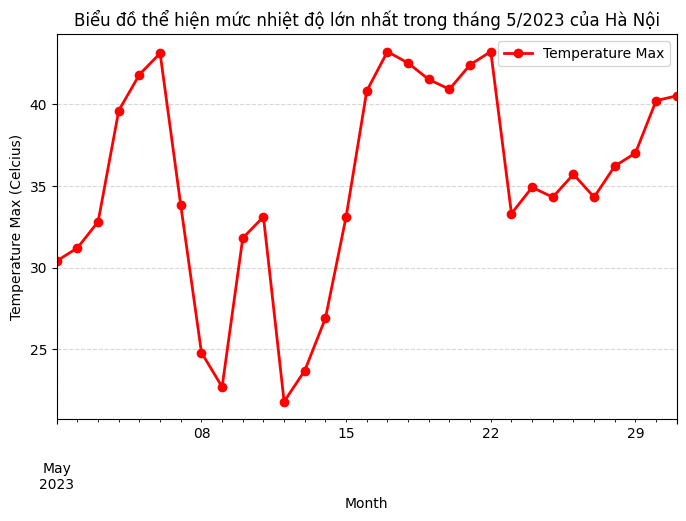

In [ ]:
plt.figure(figsize=(8, 5))
MayHN_df.groupby('Day')['Temperature Max'].mean().plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Temperature Max (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ lớn nhất trong tháng 5/2023 của Hà Nội')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


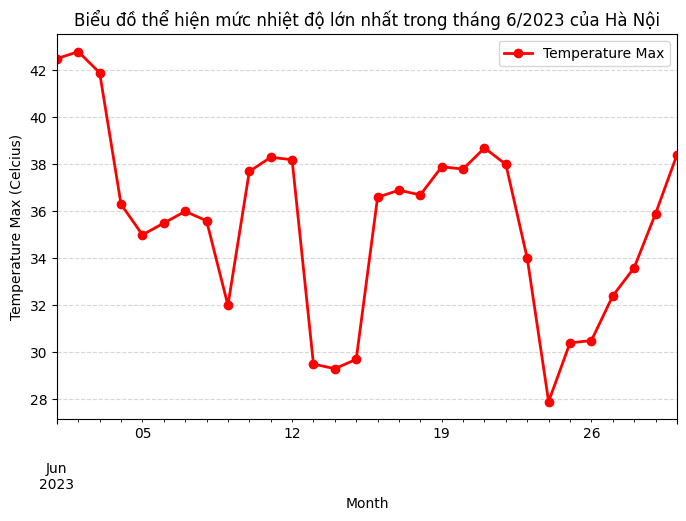

In [ ]:
plt.figure(figsize=(8, 5))
JuneHN_df.groupby('Day')['Temperature Max'].mean().plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Temperature Max (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ lớn nhất trong tháng 6/2023 của Hà Nội')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Nhận xét:**
Nhìn vào biểu đồ nhiệt độ lớn nhất ở 2 tháng nóng nhất của mùa hè tháng 5 và 6 của Hà Nội ta có thể rút ra một vài nhận xét sau:
- Tháng 6 là tháng có mức nhiệt độ cao nhất, hơn 60% nhiệt độ trong tháng đều >= 35 độ C, nhưng nhiệt độ cao nhất trong tháng chỉ là 42.8 độ C.
- Tháng 5 cũng là tháng có mức nhiệt độ cao, khoảng 50% nhiệt độ trong tháng đều >= 35 độ C, nhưng có ngày lại có nhiệt độ cao hơn cả lên đến 43.2 độ C (22/5/2023)

=> Điều này cho thấy rằng nhiệt độ của chúng ta đang ngày càng tăng lên do tác động của hiện tượng nóng lên toàn cầu, nhiệt độ cao cũng khiến cho chỉ số UV ngày càng tăng hơn và nguy hiểm hơn. Do vậy, chúng ta cần phải hành động gì đó để làm sao hạn chế được tác động của hiện tượng trên:
*  Giảm lượng khí thải: Tăng cường sử dụng và phát triển các nguồn năng lượng tái tạo như năng lượng mặt trời, gió, thủy điện, hạt nhân thay vì năng lượng từ các nguồn hóa thạch.
* Bảo vệ rừng và điều chỉnh việc sử dụng đất: Rừng, đặc biệt là rừng nhiệt đới, có khả năng hấp thụ lượng lớn khí CO2 và giảm hiệu ứng nhà kính. Việc bảo vệ và phục hồi rừng giúp giảm lượng CO2 trong khí quyển. Đồng thời, ứng dụng các phương pháp bền vững trong việc sử dụng đất, như trồng cây bảo vệ, quản lý đất và hồ, có thể giảm lượng khí thải và bảo vệ hệ sinh thái.
* Sử dụng công nghệ năng lượng hiệu quả: Tăng cường công nghệ sử dụng năng lượng hiệu quả để giảm lượng năng lượng tiêu thụ và khí thải CO2. Điển hình có thể kể đến là việc sử dụng đèn LED thay thế đèn huỳnh quang, sử dụng thiết bị điện tiết kiệm năng lượng, cải tiến năng suất nhiệt và điện trong các ngành công nghiệp...
* Khuyến khích sử dụng vận tải công cộng và giao thông bền vững: Giảm sự phụ thuộc vào xe hơi cá nhân bằng cách khuyến khích sử dụng phương tiện công cộng, đạp xe, đi bộ và điều chỉnh chính sách về giao thông công cộng. Đồng thời, xây dựng và phát triển giao thông công cộng và hạ tầng giao thông bền vững.
* Khuyến khích sử dụng năng lượng xanh: Khuyến khích sử dụng năng lượng tái tạo như năng lượng mặt trời, gió và thủy điện. Đồng thời, hỗ trợ và đầu tư vào nghiên cứu và phát triển công nghệ năng lượng xanh để giảm giá thành và tăng hiệu suất của các nguồn năng lượng tái tạo.

<ipython-input-23-a0a42aee8472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MayHN_df["Day"] = pd.to_datetime(MayHN_df["Day"])


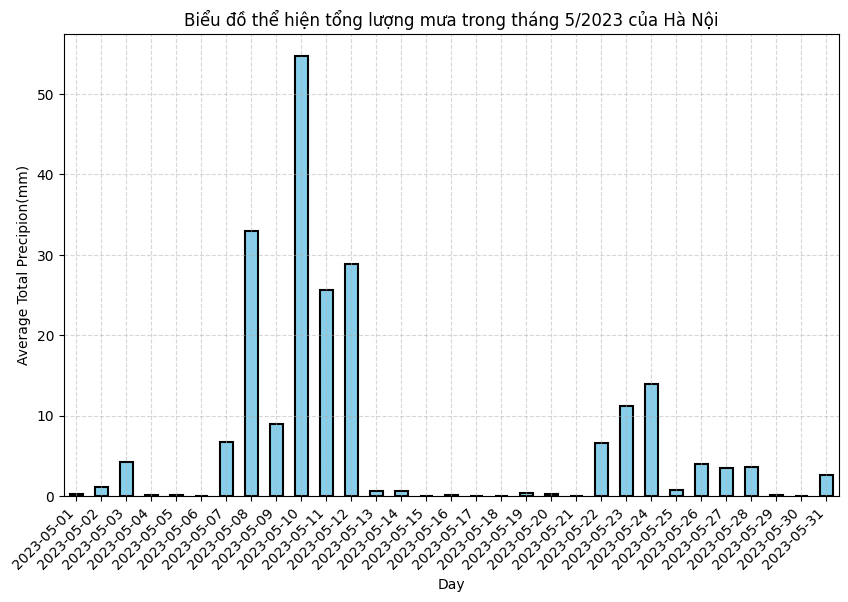

In [ ]:
MayHN_df["Day"] = pd.to_datetime(MayHN_df["Day"])

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
MayHN_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Day')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trong tháng 5/2023 của Hà Nội')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(MayHN_df.index))
xticks_label = MayHN_df["Day"].dt.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

<ipython-input-26-15c39cccad2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JuneHN_df["Day"] = pd.to_datetime(JuneHN_df["Day"])


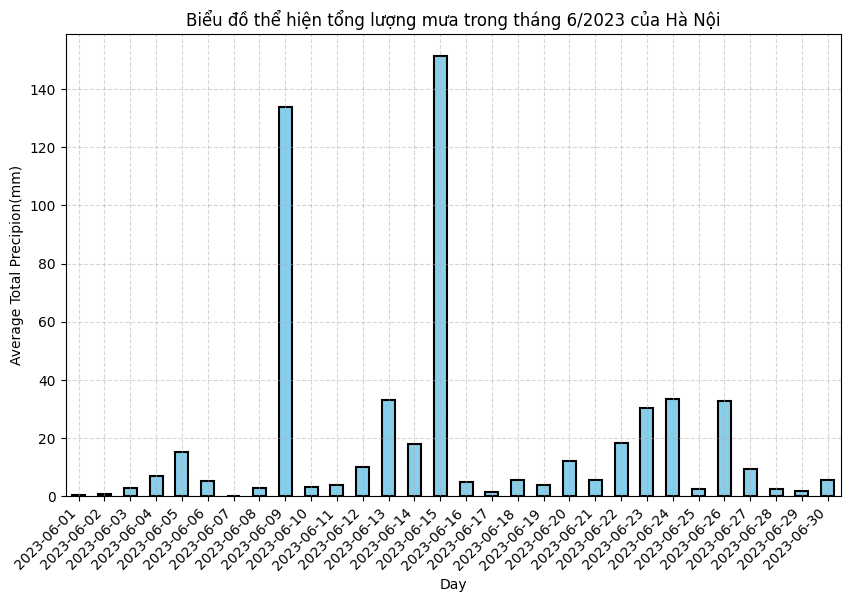

In [ ]:
JuneHN_df["Day"] = pd.to_datetime(JuneHN_df["Day"])

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
JuneHN_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Day')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trong tháng 6/2023 của Hà Nội')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(JuneHN_df.index))
xticks_label = JuneHN_df["Day"].dt.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()

**Nhận xét:**
Như nhận xét phần nhiệt độ ở trên, ta có thể thấy:
*   Tháng 5 là tháng có lượng mưa ít nhất trong các tháng, nhìn vào biểu đồ ta có thể thấy rất khô hạn, lượng mưa lớn nhất trong tháng cũng chỉ khoảng 60mm, lượng nước không đáng kể.

=> Chính vì thế mà ta có thể thấy rằng trong tháng 5 vừa qua nắng nóng, khô hạn kéo dài + mưa ít khiến cho nguồn điện từ các nhà máy thủy điện tạo ra khá là ít, khiến cho Hà Nội trong khoảng thời gian này bị cắt điện gián đoạn.
*   Tháng 6 là tháng có nền nhiệt độ cả tháng cao nhất trong các tháng và cũng ít mưa, chỉ có duy nhất 2 ngày có lượng mưa cao nhất là trên 130mm, còn lại thì vẫn có mưa nhưng không đáng kể dưới 40mm.



#### **Các tỉnh Đồng bằng sông Hồng**

In [ ]:
average_df = pd.DataFrame()
average_df["Day"] = dataFrames['Ha_Noi']['Day']
columns = ["Temperature Max", "Temperature Min", "Temperature Avg", "MaxWind_km/h", "TotalPrecip_mm", "Humidity Avg", "UV Index"]
for column in columns:
    average_df[column] = sum(dataFrames[province][column] for province in dataFrames) / 10
average_df

,Day,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
0,2022-06-29,38.34,30.48,33.80,13.89,5.500,79.6,8.3
1,2022-06-30,35.18,28.32,31.03,12.23,25.120,88.0,7.6
2,2022-07-01,35.87,28.05,31.43,12.21,15.800,84.1,7.6
3,2022-07-02,39.13,29.26,33.44,18.09,9.970,77.1,8.7
4,2022-07-03,35.66,28.53,31.14,16.34,13.331,97.5,7.8
...,...,...,...,...,...,...,...,...
362,2023-06-26,33.68,27.30,29.91,14.68,28.270,93.5,7.6
363,2023-06-27,34.77,27.30,30.55,18.97,23.570,92.3,7.7
364,2023-06-28,36.58,28.88,32.20,21.93,7.540,88.4,7.7
365,2023-06-29,38.36,29.38,33.14,21.38,3.880,86.6,8.6


In [ ]:
average_df.dtypes

Day                datetime64[ns]
Temperature Max           float64
Temperature Min           float64
Temperature Avg           float64
MaxWind_km/h              float64
TotalPrecip_mm            float64
Humidity Avg              float64
UV Index                  float64
dtype: object

In [ ]:
average = average_df.mean()
print("Trung bình:")
print(average)

Trung bình:
Temperature Max    31.371117
Temperature Min    23.748256
Temperature Avg    26.952752
MaxWind_km/h       17.284523
TotalPrecip_mm      5.969719
Humidity Avg       83.667575
UV Index            6.995640
dtype: float64


<ipython-input-29-ed8ab90a3ea0>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average = average_df.mean()


In [ ]:
# Độ lệch chuẩn
std_df = average_df.std()
print("Độ lệch chuẩn:")
print(std_df)

Độ lệch chuẩn:
Day                106 days 02:06:44.390136412
Temperature Max                       6.353817
Temperature Min                       4.899742
Temperature Avg                       5.153306
MaxWind_km/h                          4.779902
TotalPrecip_mm                       11.227766
Humidity Avg                         11.950573
UV Index                              1.341552
dtype: object


In [ ]:
var_df = average_df.var(numeric_only=True)
print("Phương sai:")
print(var_df)

Phương sai:
Temperature Max     40.370986
Temperature Min     24.007468
Temperature Avg     26.556566
MaxWind_km/h        22.847459
TotalPrecip_mm     126.062736
Humidity Avg       142.816186
UV Index             1.799762
dtype: float64


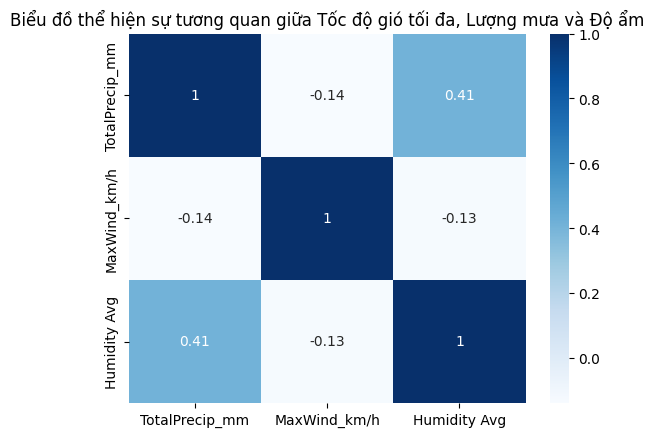

In [ ]:
data = {'TotalPrecip_mm': average_df['TotalPrecip_mm'],
        'MaxWind_km/h': average_df['MaxWind_km/h'],
        'Humidity Avg': average_df['Humidity Avg']}
df = pd.DataFrame(data)
# Tính ma trận tương quan
corr_matrix = df.corr()
# Vẽ biểu đồ tương quan
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Biểu đồ thể hiện sự tương quan giữa Tốc độ gió tối đa, Lượng mưa và Độ ẩm")
plt.show()

In [ ]:
average_df = average_df.set_index('Day')
average_df = average_df.groupby(pd.Grouper(freq='M')).mean()
average_df

,Temperature Max,Temperature Min,Temperature Avg,MaxWind_km/h,TotalPrecip_mm,Humidity Avg,UV Index
Day,,,,,,,
2022-06-30,36.760000,29.400000,32.415000,13.060000,15.310000,83.800000,7.950000
2022-07-31,36.447742,29.061290,32.165806,16.172258,7.059194,85.851613,8.019355
2022-08-31,34.739032,28.207097,30.967742,14.005484,14.783194,90.912903,7.477419
2022-09-30,33.721000,26.603000,29.628333,13.518000,11.651567,89.963333,7.400000
2022-10-31,30.909032,23.298065,26.636452,17.459032,5.714387,80.638710,7.135484
2022-11-30,31.491000,23.964667,27.309000,16.885000,4.086333,83.200000,6.963333
2022-12-31,21.687097,15.907097,18.538710,15.766129,0.330323,72.893548,5.129032
2023-01-31,23.073871,16.036452,19.274839,15.259355,0.414839,72.874194,5.441935
2023-02-28,25.157500,19.899286,22.106429,16.656786,0.736429,87.000000,5.714286


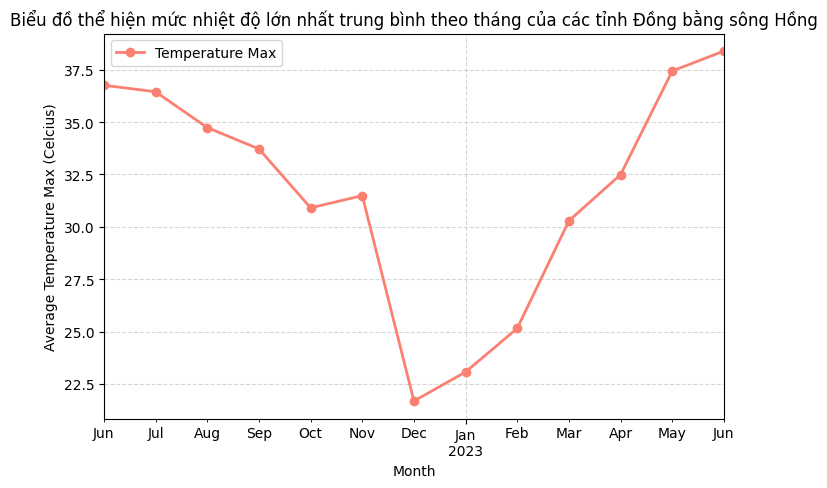

In [ ]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['Temperature Max'].mean().plot(color='salmon', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Average Temperature Max (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ lớn nhất trung bình theo tháng của các tỉnh Đồng bằng sông Hồng')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


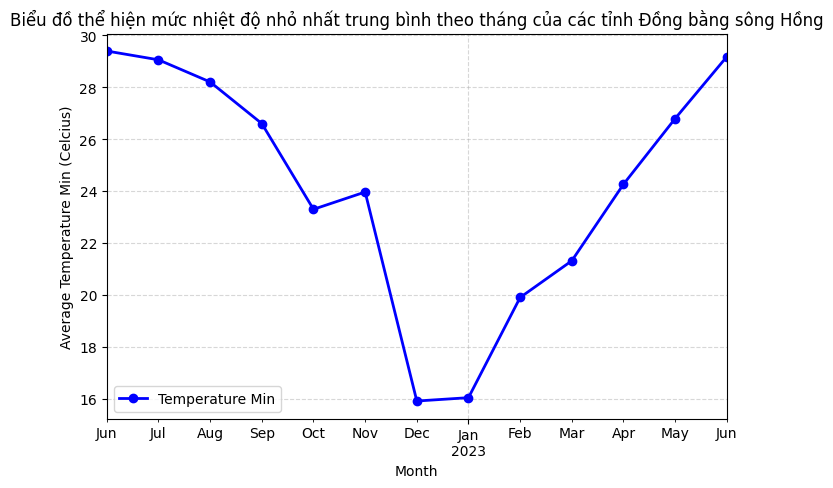

In [ ]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['Temperature Min'].mean().plot(color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Average Temperature Min (Celcius)')
plt.title('Biểu đồ thể hiện mức nhiệt độ nhỏ nhất trung bình theo tháng của các tỉnh Đồng bằng sông Hồng')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


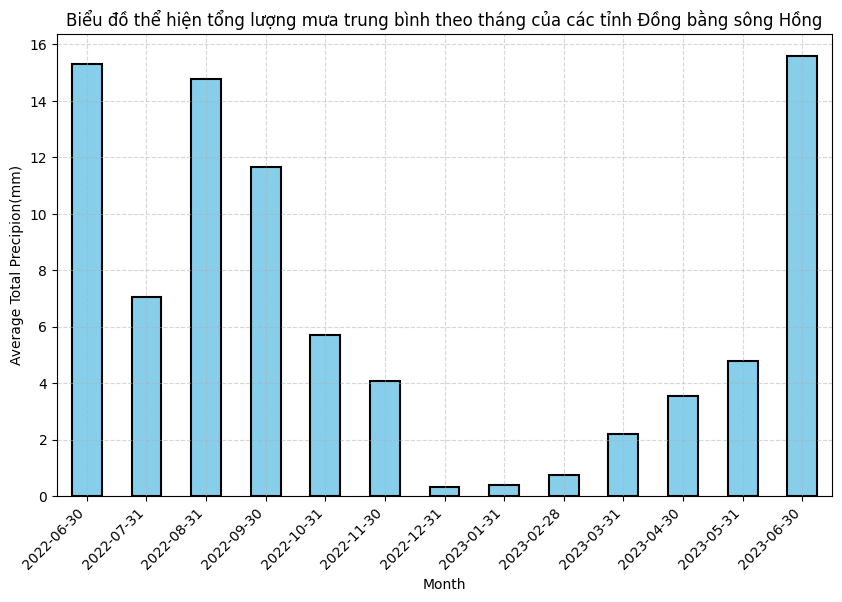

In [ ]:
plt.figure(figsize=(10, 6))
average_df.groupby('Day')['TotalPrecip_mm'].mean().plot.bar(color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Average Total Precipion(mm)')
plt.title('Biểu đồ thể hiện tổng lượng mưa trung bình theo tháng của các tỉnh Đồng bằng sông Hồng')
plt.grid(True, linestyle='--', alpha=0.5)
xticks_loc = np.arange(len(average_df.index))
xticks_label = average_df.index.strftime("%Y-%m-%d")
plt.xticks(xticks_loc, xticks_label, rotation=45, ha='right')
plt.show()


**Nhận xét:**
- Tháng 6/2022, 8/2022 và 6/2023 là 3 tháng có lượng mưa lớn nhất trong tập quan sát thu thập giai đoạn từ 29/02/2022 - 30/06/2023.
- Mùa mưa ở miền Bắc thường diễn ra vào khoảng từ Tháng 6 - Tháng 9. Tháng 10, 11 tuy vẫn còn nhưng số lượng sẽ ít hơn, vì lúc này thời tiết đang là mùa Thu và sắp chuyển giao sang mùa Đông.
- Từ các Tháng 12 - Tháng 2 do là thời tiết lạnh, hanh khô và đã là mùa đông lên lượng mưa giảm.

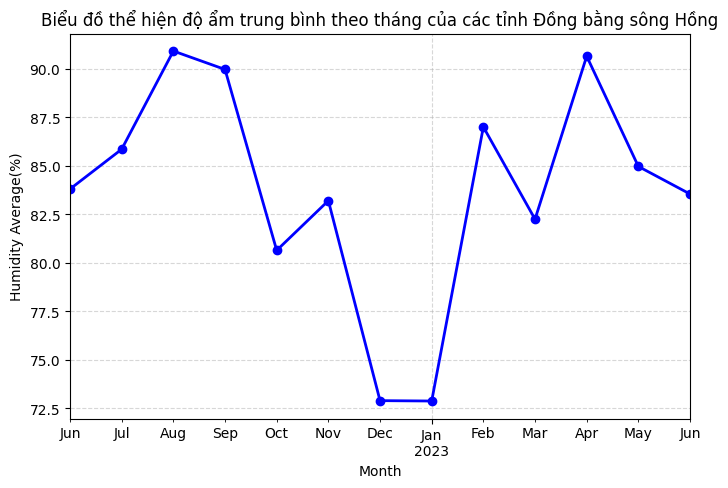

In [ ]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['Humidity Avg'].mean().plot(color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Humidity Average(%)')
plt.title('Biểu đồ thể hiện độ ẩm trung bình theo tháng của các tỉnh Đồng bằng sông Hồng')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**
- Tháng có độ ẩm lớn nhất thường rơi vào những tháng 8 và 9. Tuy nhiên trong những khoảng thời gian này, thời tiết ở các tỉnh Đồng bằng sông Hồng lại không xảy ra những hiện tượng nồm ẩm như khoảng tháng Giêng và ngoài Giêng tầm Tháng 2 - 4.
- Lý giải hiện tượng này ta có thể giải thích như sau bởi vì khoảng này là thời tiết vừa chuyển từ Hè - Thu nên nền nhiệt độ vẫn còn cao mặc dù đã không còn gay gắt như khoảng tháng 5, 6, mát mẻ, không quá lạnh, hơi nước không có đủ khả năng tồn tại trong không khí dưới dạng nước, và do đó, không gây ra hiện tượng nồm ẩm.
- Tháng 10 - 1 năm sau, đây là khoảng thời tiết mùa đông, nhiệt độ thấp, lạnh và hanh khô. Khi nhiệt độ giảm, khả năng của không khí để chứa hơi nước cũng giảm đi. Điều này có nghĩa là không khí trong mùa đông có khả năng chứa ít hơi nước hơn, dẫn đến độ ẩm thấp hơn. Thêm nữa, mùa đông ít mưa hoặc không có mưa. Thiếu mưa làm giảm nguồn cung cấp hơi nước từ nguồn nước như sông, hồ và đất, dẫn đến độ ẩm cũng thấp hơn trong không khí.
- Mùa đông thường có sự hiện diện của gió lạnh và khô. Gió lạnh từ các vùng cận nhiệt đới thổi vào khu vực, mang theo không khí khô và không chứa nhiều hơi nước. Điều này làm tăng sự bay hơi và làm giảm độ ẩm trong không khí.
- Tháng Xuân 2 - 4: Bởi vì đây là thời điểm chuyển giao giữa mùa đông và mùa xuân ở miền Bắc. Trong giai đoạn này, sự không ổn định của khí hậu và các luồng gió từ phía Bắc có thể mang theo hơi nước từ các vùng biển và sông lớn, tạo ra độ ẩm cao trong không khí. Sự giao thoa giữa không khí lạnh từ phía Bắc và ấm từ phía Nam gặp nhau cũng có thể gia tăng thêm độ ẩm không khí và gây ra hiện tượng nồm ẩm. Tác động của hướng gió: Tùy thuộc vào hướng thổi gió, miền Bắc có thể nhận được luồng không khí ẩm từ các vùng biển nhiệt đới hoặc châu Á. Điều này khiến cho độ ẩm tăng lên và góp phần vào sự xuất hiện nồm ẩm.


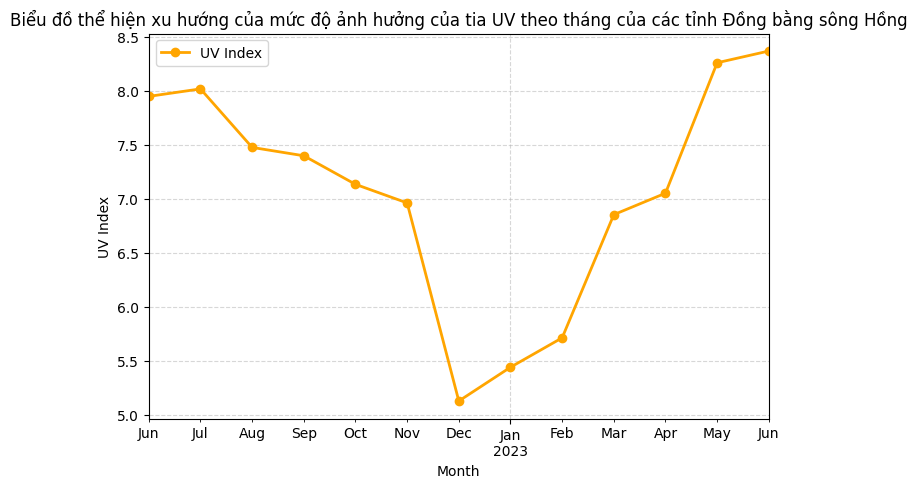

In [ ]:
plt.figure(figsize=(8, 5))
average_df.groupby('Day')['UV Index'].mean().plot(color='orange', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('UV Index')
plt.title('Biểu đồ thể hiện xu hướng của mức độ ảnh hưởng của tia UV theo tháng của các tỉnh Đồng bằng sông Hồng')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét:**

Nhìn ở biểu đồ này, ta cũng cần đáng cảnh báo về hiện tượng nóng lên toàn cầu hiện nay đc gây nên bởi hiệu ứng El Nino mà Trái Đất đang phải đối mặt, nó khiến cho cường độ ánh sáng trở nên mạnh và nguy hiểm hơn. Nhìn trên biểu đồ kia ta cũng dễ dàng thấy là mức trung bình thấp nhất ở đây cũng là 5 - mức trung bình, mặc dù là vẫn có những ngày ở mức thấp nhưng tính theo trung bình tháng thì cũng đang là ở mức trung bình

1. Mùa đông (Tháng 12 - Tháng 2): Mức độ tia UV thường thấp hơn vào mùa đông. Có nắng nhưng mức độ ánh sáng không mạnh, gắt và thời tiết có thể khá mây mù, dẫn đến mức độ nguy hiểm của tia UV cũng chỉ ở mức trung bình.

2. Mùa xuân (Tháng 2 - Tháng 4): Khi thời tiết bắt đầu chuyển sang mùa xuân thời tiết trở nên ấm áp hơn, vẫn có rét tuy nhiên có sự đan xen của những ngày mưa xuân nên mức độ tia UV cũng tăng lên và đang ở mức cao nên khi ra ngoài, tiếp xúc trực tiếp với ánh nắng mặt trời ta cũng cần phải che chắn kín đáo và sử dụng kem chống nắng.
3. Mùa hè (Tháng 5 - Tháng 8): Trong mùa hè, mức độ tia UV thường cao nhất trong năm. Ánh sáng mặt trời mạnh mẽ, gay gắt và dữ dội, trời ít mây. Nhìn vào biểu đồ ta cũng có thể thấy tăng lên rõ ràng từ mức cao -> rất cao. Đặc biệt nếu quan sát kỹ những ngày có nền nhiệt độ cao nhất trong tháng nóng ở trên bảng số liệu thì còn có những ngày chỉ số UV lên tới 10.
4. Mùa thu (Tháng 9 - Tháng 11): Mức độ tia UV có xu hướng giảm đi khi mùa thu đến. Ánh sáng mặt trời không còn quá mạnh và thời tiết có thể mát mẻ hơn. Tuy nhiên, việc bảo vệ da vẫn cần thiết để ngăn chặn các vấn đề như lão hóa da và ung thư da.

=> Mức độ tia UV trong các tháng trong năm có thể ảnh hưởng đáng kể đến sức khỏe của con người. Vì vậy, việc bảo vệ da khỏi tác động của tia UV là rất quan trọng, bất kể thời gian nào trong năm. Sử dụng kem chống nắng, đeo mũ, áo chống nắng và kính râm, cũng như tránh tiếp xúc trực tiếp với ánh sáng mặt trời vào giữa ngày có thể giúp giảm nguy cơ bị tổn thương do tia UV.